
# <a name='link2'>**Continuous Distributions**</a>

**10 points**

### Let's import the libraries 

In [5]:
# import the important packages
import pandas as pd  # library used for data manipulation and analysis
import numpy as np  # library used for working with arrays
import matplotlib.pyplot as plt  # library for plots and visualizations
import seaborn as sns  # library for visualizations

%matplotlib inline

import scipy.stats as stats  # this library contains a large number of probability distributions as well as a growing library of statistical functions

### Problem statement


IT industry records the amount of time (in hours) a software engineer needs to fix a  bug in the initial phase of software development in 'debugging.csv'.

Let $X$ be the time needed to fix bugs.

$X$ is a continuous random variable. We will look first which common distribution describes $X$ best. 

Using the selected common distribution we will answer the following questions:


1. Find the probability that a randomly selected software debugging requires less than three hours.

2. Find the probability that a randomly selected software debugging requires more than two hours.

3. Find the 90th percentile of the software debugging time.



### Reading the Data into the Dataframe

In [6]:
debugging = pd.read_csv("debugging.csv") # TODO: read in the csv file
debugging.head(5) # TODO: look at the first 5 rows of the dataset

,Bug ID,Time Taken to fix the bug
0,12986,2.42
1,12987,2.03
2,12988,2.74
3,12989,3.21
4,12990,3.40


### Visualizing the Data

Let's plot the histogram of data along with the PDF of uniform distribution using the parameters minimum time required and maximum time required for bug fixing.

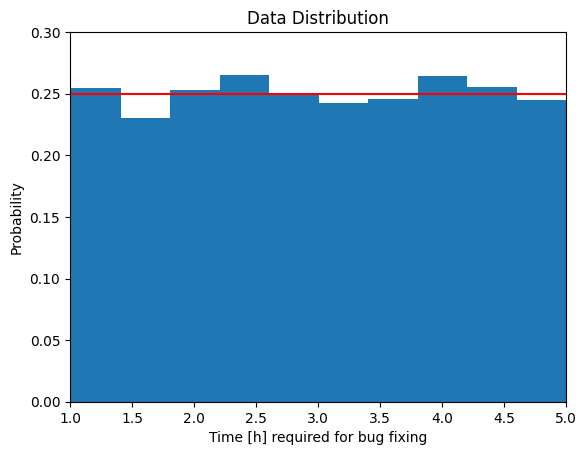

In [7]:
# Visualize the distribution of the time needed for bug fixing
plt.hist(debugging['Time Taken to fix the bug'], density=True) # TODO: plot a histogram to visualize the distribution of debugging time
plt.axhline(1 / 4, color="red") # add a horizontal line
plt.xlabel("Time [h] required for bug fixing")
plt.ylabel("Probability")
plt.title("Data Distribution")
plt.axis([1, 5, 0, 0.3])
plt.show()

Another way to recognize a uniform distribution in your data is to look at a density plot. We will use displot of seaborn library to visualize the distribution of time needed for bug fixing.

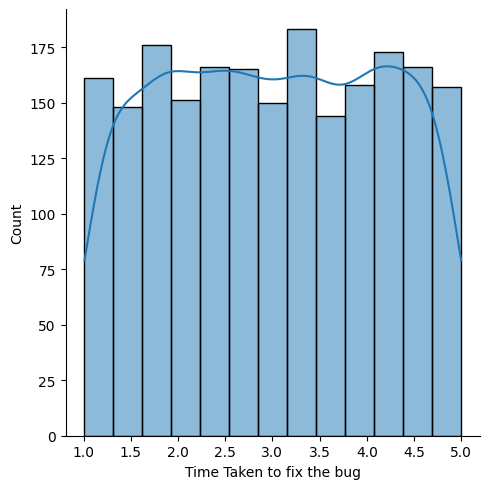

In [8]:
# Visualize the distribution of the time needed for bug fixing using seaborn
sns.displot(debugging['Time Taken to fix the bug'], kde=True) # TODO: make a density plot of time taken to fix the bug
plt.show()

__Insight__: From the above plot we see that the time varies between 1 and 5 hours. We also see that all the values between 1 and 5 are having almost equal probability, so we are going to use continuous uniform distribution on the interval (1,5) for this problem. 

In [19]:
# import the required function
from scipy.stats import uniform

# use the uniform.pdf() function to generate the probability distribution
x = np.linspace(1, 5, 50)
probs = uniform.pdf(x, loc=1, scale=4)

### Answering Questions from the Problem Statement

__1. Find the probability that a randomly selected software debugging requires less than three hours.__

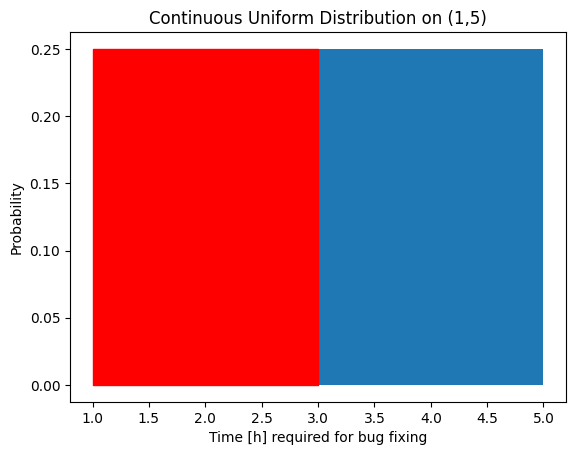

In [10]:
# We are plotting the distributions to visualize the problem before performing the calculations.
x1 = np.linspace(1, 3, 25)
plt.fill_between(x, probs)
plt.fill_between(x1, uniform.pdf(x=x1, loc=1, scale=4), color="r") #represent P(X<=3) by a red region
plt.xlabel("Time [h] required for bug fixing")
plt.ylabel("Probability")
plt.title("Continuous Uniform Distribution on (1,5)")
plt.show()

The red region shows the region of interest for this question.

In [27]:
# Using uniform.cdf() to answer the first question
uniform.cdf(3,loc=1,scale=4) # TODO: calculate the probability that a randomly selected software debugging requires a maximum time of 3 hours

0.5


__2. Find the probability that a randomly selected software debugging requires more than two hours.__

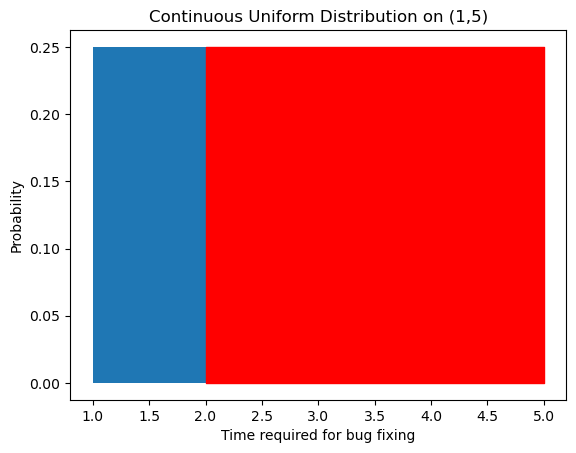

In [8]:
# We are plotting the distributions to visualize the problem before performing the calculations.
x1 = np.linspace(2, 5, 20)
plt.fill_between(x, probs)
plt.fill_between(x1, uniform.pdf(x=x1, loc=1, scale=4), color="r") #represent P(X>2) by a red region
plt.xlabel("Time required for bug fixing")
plt.ylabel("Probability")
plt.title("Continuous Uniform Distribution on (1,5)")
plt.show()

As before, the red region shows the region of interest for this question.

In [28]:
# Using uniform.cdf() to answer the second question
1 - uniform.cdf(2,loc=1,scale=4) # TODO: calculate the probability that a randomly selected software debugging requires more than 2 hours

0.75

__3. Find the 90th percentile of the software debugging time.__

ppf(): It is used to calculate the percentile point given probability. 

In [32]:
# Using uniform.ppf() to answer the thrid question
uniform.ppf(0.90,loc=1,scale=4) # TODO: calculate the 90th percentile of the debugging time.

4.6